# Challenge 1 : unsupervised learning 

## Group 9

 - DAHDOUH Safaa
 - Kassimi Hamza
 - KOUAME Yassi
 - YAO Kouamé
 - YAPI Regis

In order to analyse the dataset with python, we have to import different libraries that will help us during this challenge.


In [7]:
# Standards
import pandas as pd
import numpy as np
import scipy.cluster.vq as vq
import sklearn


#Graphs 
import seaborn as sns
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

#factor_analyzer 
#conda install -c desilinguist factor_analyzer

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#factors check
#conda install -c conda-forge pingouin
import pingouin as pg

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import ward, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy



def plot_corr(corr):
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(10, 220, as_cmap=True)

    sns.heatmap(corr, annot=True,mask=mask, cmap=cmap)


# Data Exploration

In [8]:
# Load the data
happiness = pd.read_csv("happiness_2019.csv",sep=",")
# Dataset
happiness.head(14)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


Country or region : The name of each country in our data set

Score : A metric measured in 2019 by asking the sampled people: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest.

GDP per capita : GDP per capita measures the sum of marketed goods and services produced within the national boundary, averaged across everyone who lives within this territory

Social support : Social support is the perception and actuality that one is cared for, has assistance available from other people, and most popularly, that one is part of a supportive social network. 
Healthy life expectancy : Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year. It characterizes mortality and morbidity regardless of the age structure.

Freedom to make life choices : National average of binary responses to the question "Are you satisfied or dissatisfied with your freedom to choose what you do with your life?"

Generosity : The national average of responses to the question "Have you donated money to charity?" over GDP per capita.

Perceptions of corruption : The average of binary responses to the question: "Is corruption widespread throughout the country or not"

We use the following functions to get :
 - General information of the dataset : number of rows and columns
 - Summary that includes a list of all columns with their data types and the number of non-null values in each column along with memory usage.
 - Statistical description of our data : Mean, standard deviation...

In [9]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [10]:
#Data profiling
happiness.info()
happiness.duplicated().sum()

# Statistical summary of the data
happiness.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
unique,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78.500000,NaN,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,NaN,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,NaN,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,NaN,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,NaN,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,NaN,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250


Concerning the score we remark that the average is 5,40796. Respectively, the max and min values are 2.853000 and 7.769000 the standard deviation is 1.113120 that implies that we suppose a strong proportion of countries who live in normal conditions.
Concerning the GDP per capita, we remark that the min's value equals to 0. That is not normal, this value is outlier value.

Concerning Healthy life expectancy we notice the min value equals to 0 which means that there is always a susceptibility that in some countries a person falls sick.

Freedom to make life choices: This Shows the flexibility We observe that in everything that is freedom of expression--Min
Generosity : Min = 0,18

Mustache box, it corroborates what has been said above in our description. The values that come out are explained by everything we have just said above


We notice at the level of the explanatory variable corruption a low standard deviation and a mean close to zero. This means that corruption can be found almost everywhere

Moreover, against all expectations, the country with the highest corruption rate is a European country: Moldova

# Commentaire 

In order to get a better understanding of our data, we visualised the score of happiness of each country on a map to understand the geographical distribution.
A general look on the map shows that the scandinavian countries have the highest score.


In [11]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
         marker_line_width=1,
        locations = happiness['Country or region'],
        locationmode = "country names",
        z = happiness['Score'],
        text = happiness['Country or region'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = '2019 Happiness Score',geo = dict(projection = {'type':'hammer'}, showocean = False, showlakes = False, showrivers = False, ))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

Box plot is another method to display graphicallystatistical characteristic of data. We had first to normalise the data as they are not all on the same scale. Without normalisation, we would get an unreadable plot.

The normalisation was done after removing the category variable 'Country or region' and by resizing the numerical variables to better compare them in a common scale.


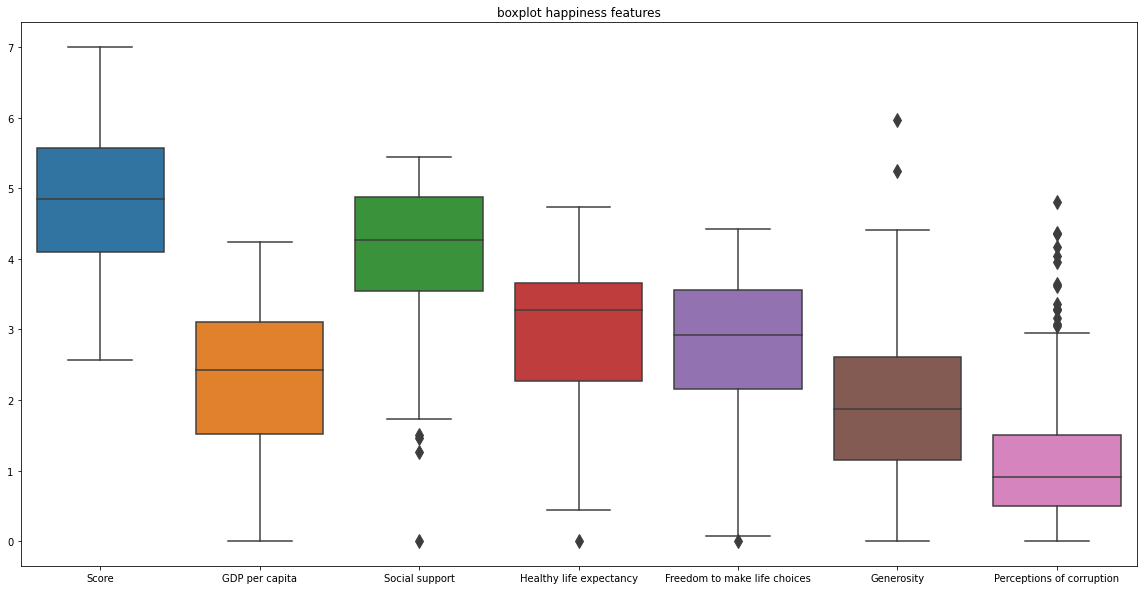

In [12]:
plt.figure(figsize=(20,10))
plt.title('boxplot happiness features')
happiness_new = happiness.drop(columns=["Country or region","Overall rank"])
happiness_scal=vq.whiten(happiness_new) #Data normalization
happiness_box=sns.boxplot(data=happiness_scal,fliersize=10)   # fliersize is the size used to indicate the outliers
plt.xticks([0,1, 2, 3,4,5,6], ['Score', 'GDP per capita', 'Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])
plt.show()

Outliers are observed in the boxplot, which is consistent with our data exploration above.

The representation of dataset per feature using scatter plots, helped in better visualising the relationship between each feature and the score of happiness and compare it between diffrent features' graph


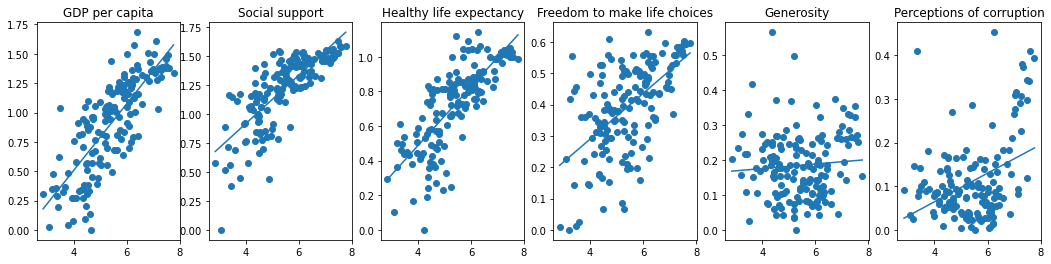

In [16]:
# Representation of data regression
MyCol = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices','Generosity','Perceptions of corruption']

_, axes = plt.subplots(ncols=6, figsize=(18,4))

for i, (ax, col) in enumerate(zip(axes, MyCol)):
    m, b = np.polyfit(happiness['Score'], happiness[col], 1)
    ax.scatter(happiness['Score'], happiness[col])
    ax.plot(happiness['Score'], m*happiness['Score'] + b)
    ax.set_title((f'Score vs {col}'))
    ax.set_title(f'{col}')



The linear regression graphs enable us to observe the correlation tendency between the criteria as well as the degree of dispertion

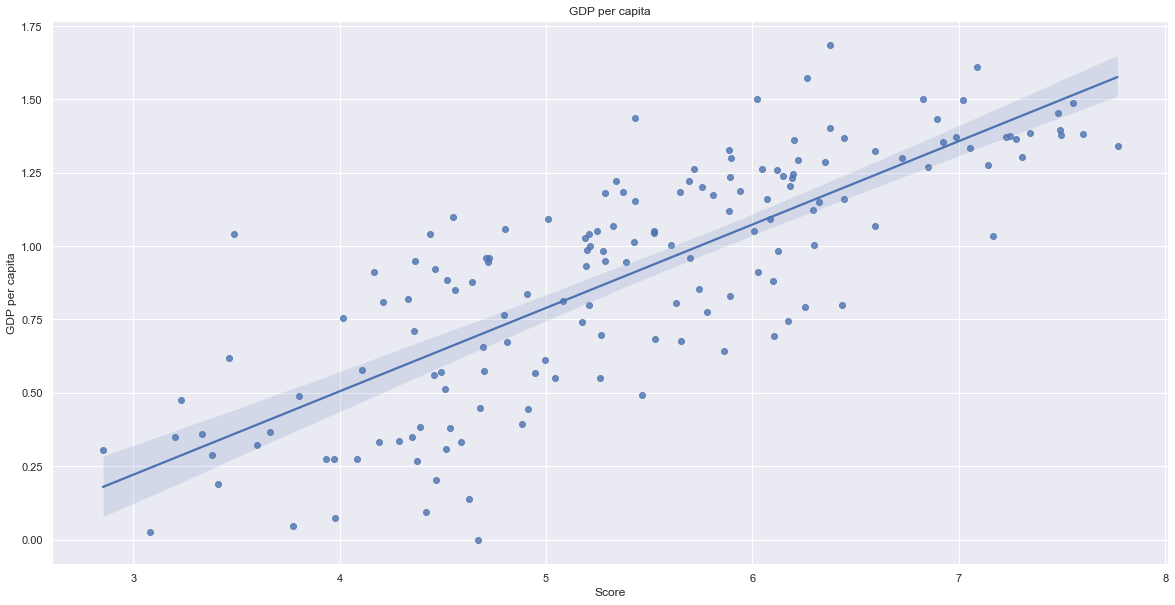

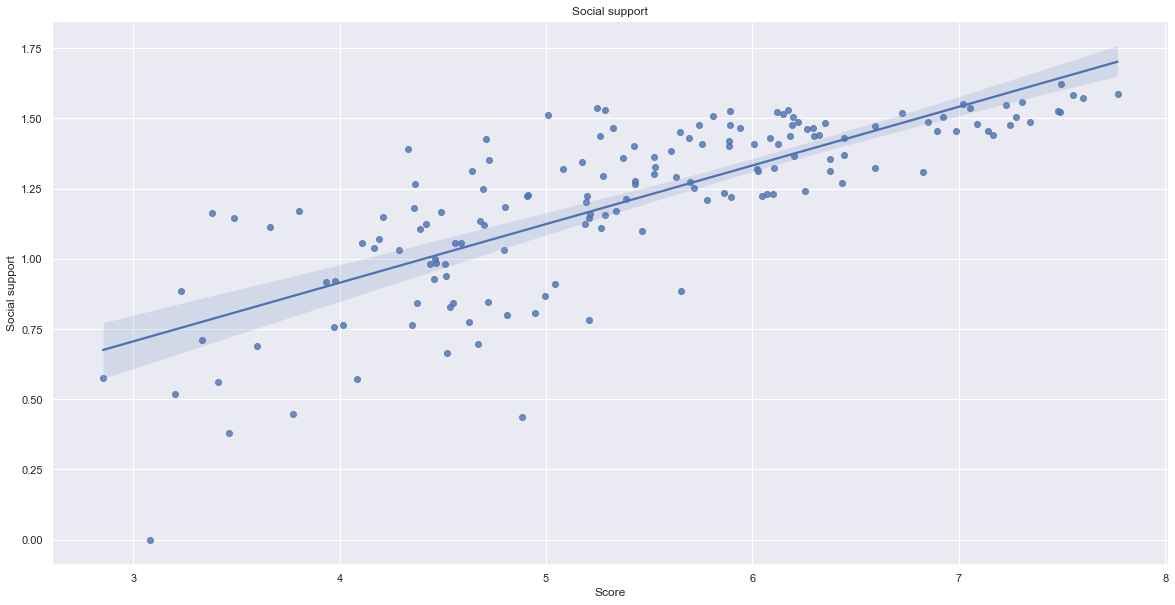

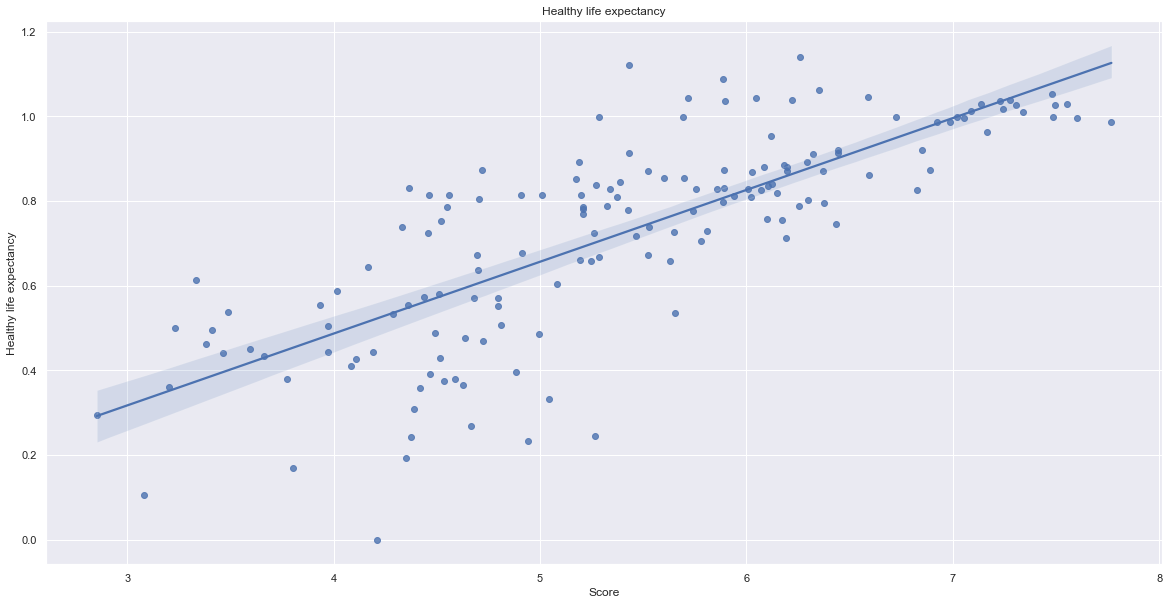

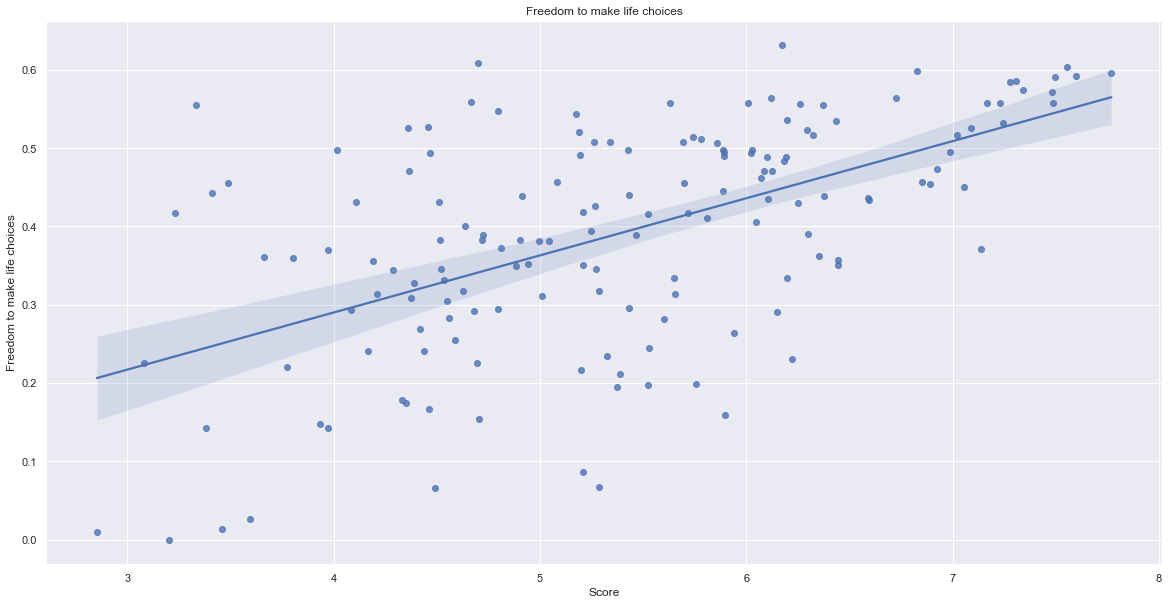

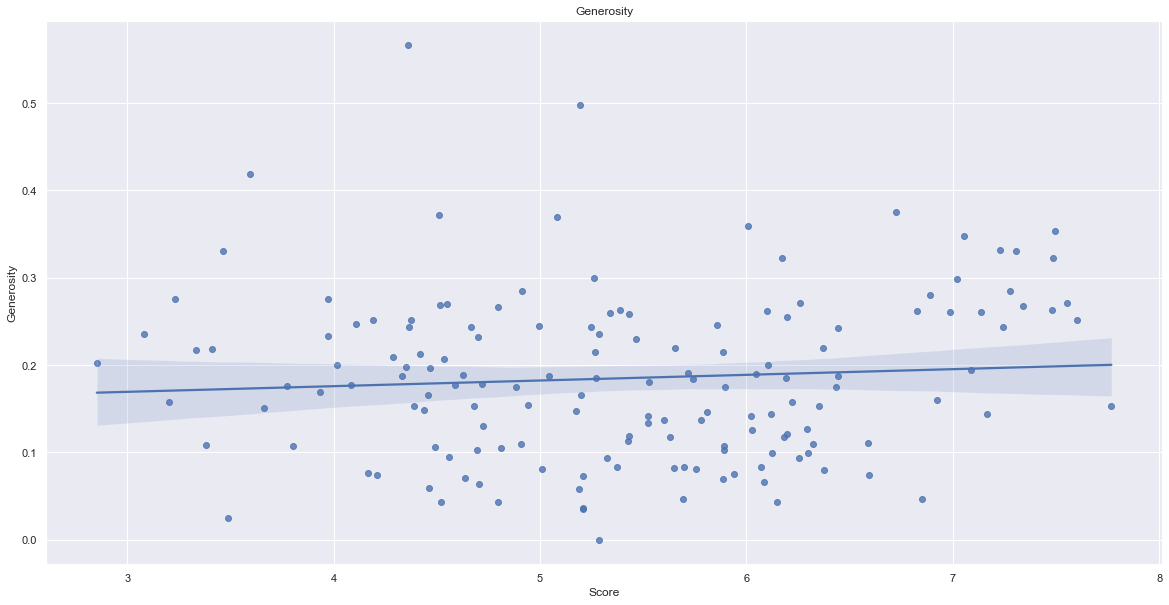

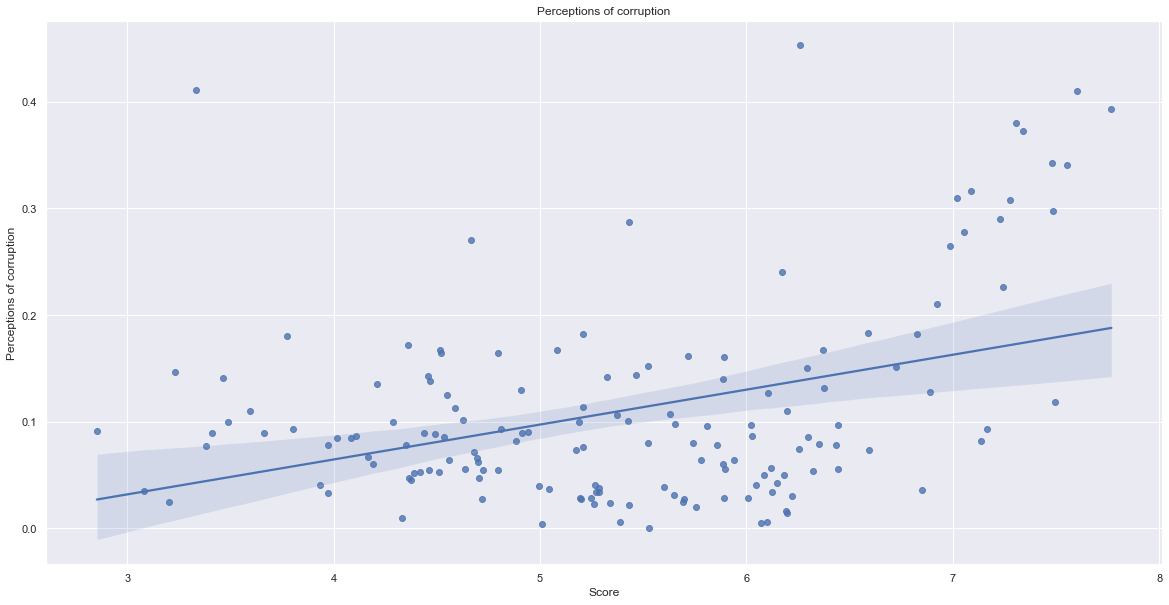

In [17]:
sns.set_theme(color_codes=True)

sns.set(rc={'figure.figsize':(20,10)})

for col in MyCol:
    sns.regplot(x="Score", y=col, data=happiness).set_title(col)
    plt.show()


It is also interesting to display the data using histogram and density function.

We can easily observe the distribution according to score classes. Most countries have a score between 4 and 7.


C:\Users\hkass\miniconda3\envs\LAB_3.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



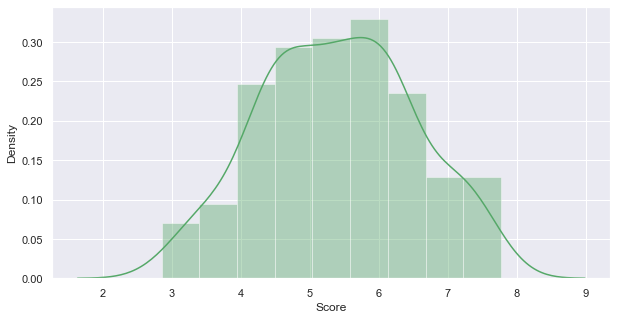

In [18]:
import seaborn as sb
f,axes = plt.subplots(figsize=(10,5))
a=sb.distplot(happiness['Score'],kde=True,hist=True,color="g")

##  5 countries with highest and lowest scores :

This list confirms our previous observation of Scandinavian countries having the highest happiness score

In [19]:
#the 5 countries with the highest score
top5=happiness.head(5)
top5

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


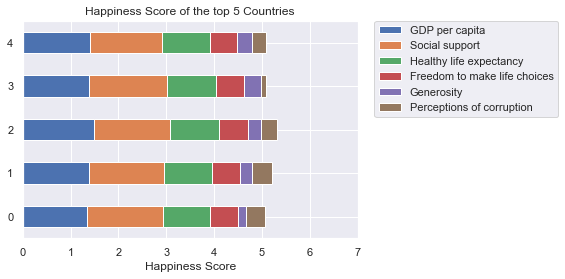

In [20]:
#cumulative bar chart of top 5 countries
top5[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].plot(kind='barh',
                                                                xticks=np.arange(8), stacked=True, figsize= (6, 4))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 5 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
#the 5 countries with the lowest score
last5=happiness.tail(5)
last5

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


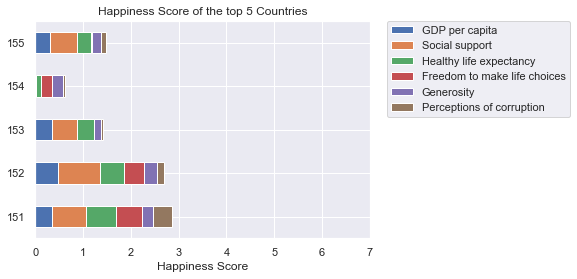

In [22]:
#cumulative bar chart of 5 countries with the lowest score
last5[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].plot(kind='barh',
                                                                xticks=np.arange(8), stacked=True, figsize= (6, 4))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 5 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

If we compare countries with highest happiness score with the ones with lowest scores, we can observe that the lowest have a  low GDP per capita whereas the top5 have a high GDP.The same remark is applied also on social support and healthy life expectancy.
We will use Correlation matrix to confirm this hypothesis.

C:\Users\hkass\AppData\Local\Temp/ipykernel_91384/3127104217.py:41: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



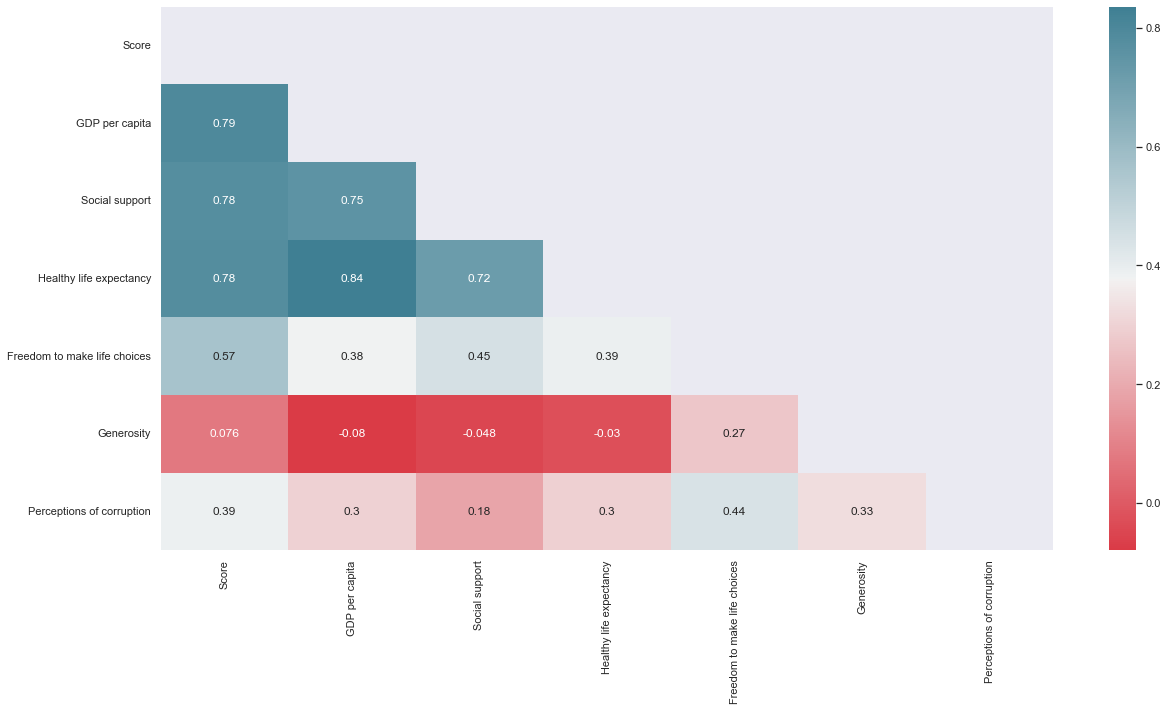

In [23]:
corr = happiness_new.corr()

#Heatmap display 1 
plot_corr(corr)
plt.show()
#Heatmap display 2
#sns.heatmap(corr,annot=True)


What variables have strong positive impact on happiness score?

According to the above correlation plot, GDP, Social support, Healthy life expectancy play the most significant role in contributing to happiness. Freedom to make life choices, Generosity and perceptions of corruption have the lowest impact on the happiness score.

# Dimensionality Reduction using Factor Analysis in Python!

### Factor Analysis Adequacy Check

In [24]:
happiness_scal_fa=np.delete(happiness_scal, 0, 1)
#happiness_scal_fa=happiness_scal
#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(happiness_scal_fa)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(happiness_scal_fa)
print(kmo_model)

429.4958605985758 2.0918689671413455e-82
0.7436876950184111


Now that the data is ingested, we must check if factor analysis is feasible.  Bartlett Sphericity  Test is a check of intercorrelation between manifest variables, which means the comparison of the observed correlation matrix and the identity matrix.  If factor analysis is an appropriate method to use, the correlation matrix and the identity matrix will not be the same, and the test will be significant. Luckily, the Bartlett Sphericity Test based on our  data produced a significant p-value of 2.0e-82.  

Next, the KMO test (Kaiser-Meyer-Olkin) should test whether it is appropriate to use the manifest variables for factor analysis. The test involves the computation of the proportion of variance among the manifest variables.  The KMO values range between 0-1 and a proportion under 0.6 would suggest that the dataset is inappropriate for factor analysis.  Our data is still appropriate with the KMO test at 0.74. 

### Determining the number of factors

This next step is to aid the decision about the number of factors used in a solution.  In this step, we get the eigenvalues of our initial solution, and plot them on a scree plot.  We can find the number of generated factors vs. the eigenvalues.  Eigenvalues that are greater than or equal to 1 should be considered when choosing the number of factors.  A factor with an eigenvalue of 1 accounts for at least the variance of a single feature.  The highly subjective elbow method can also be used.

[2.98959191 1.42560311 0.60985118 0.55627272 0.26132351 0.15735757]


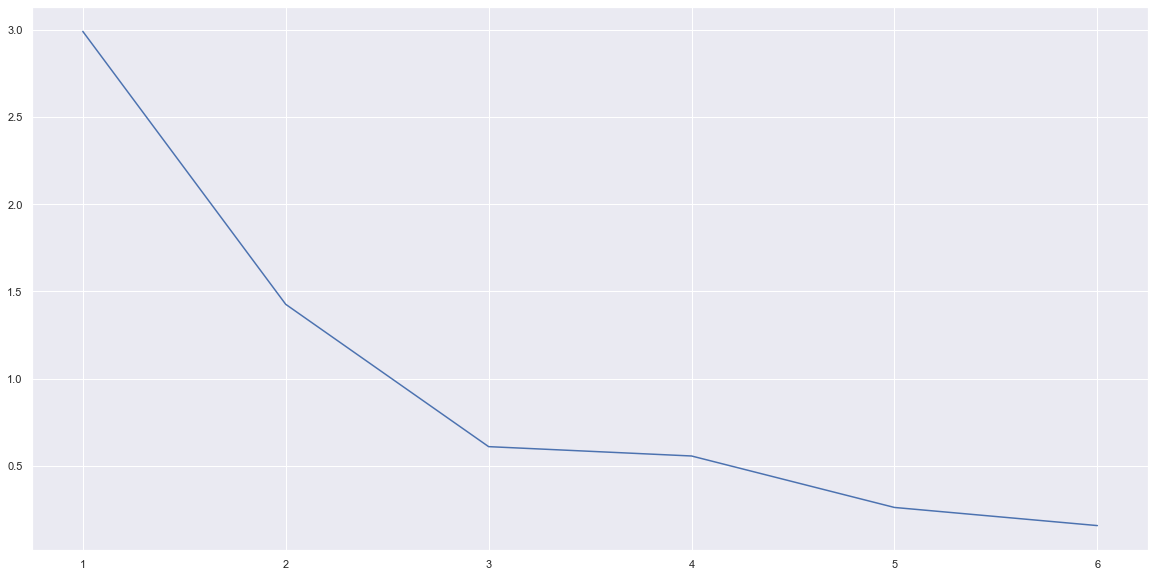

In [25]:

#we removed the Scare ????
fa=FactorAnalyzer(rotation=None ,method='minres', n_factors=3) #n_factors=3, rotation='equamax',method ='principal'
fa.fit(X=happiness_scal_fa)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
print(ev)
plt.plot(range(1,happiness_scal_fa.shape[1]+1),ev)


We will only use 2 factors here, given the big dropoff in eigenvalue after the 2rd factor. These factors have eigenvalues of 2.98 and 1.42 , meaning that they describe the variance of about 4.42 variables of 6.

### Finding the best method and the best rotation

In [26]:
#Finding the best method and the best rotation

methods=['minres', 'ml', 'principal']
rotations=['varimax','promax','oblimin','oblimax','quartimin','quartimax','equamax']
Best=[]
#Best.append(0)
for m in range(0,3):
        for r in range(0,7):
            fa=FactorAnalyzer(n_factors=2,rotation=rotations[r],method=methods[m])
            fa.fit(X=happiness_scal_fa)
            _,a,_=fa.get_factor_variance()
            Best.append(sum(a))
            if sum(a)>Best[r+1-1] :
                print(methods[m] + ' , ' + rotations[r] + ' : ' + str(sum(a)) )

principal , varimax : 0.7358658373497207
principal , promax : 0.7420005447103171
principal , oblimin : 0.7271195888442625
principal , oblimax : 0.7358658373497207
principal , quartimin : 0.7271195888442625
principal , quartimax : 0.7358658373497206
principal , equamax : 0.7358658373497206


Using the rotated factor variance , we can interpret the factors as follow :
The method principal and the oblique rotation promax gives as the best score of variance,in which the two factors explain 0.742 or 74.2% of the variation in the data.

### INTERPRETING THE FACTORS

Factor Loadings 
                              Factor 1  Factor 2
GDP per capita                0.941705 -0.044164
Social support                0.899820 -0.045801
Healthy life expectancy       0.913029 -0.003171
Freedom to make life choices  0.368543  0.594274
Generosity                   -0.345360  0.861519
Perceptions of corruption     0.132083  0.741567


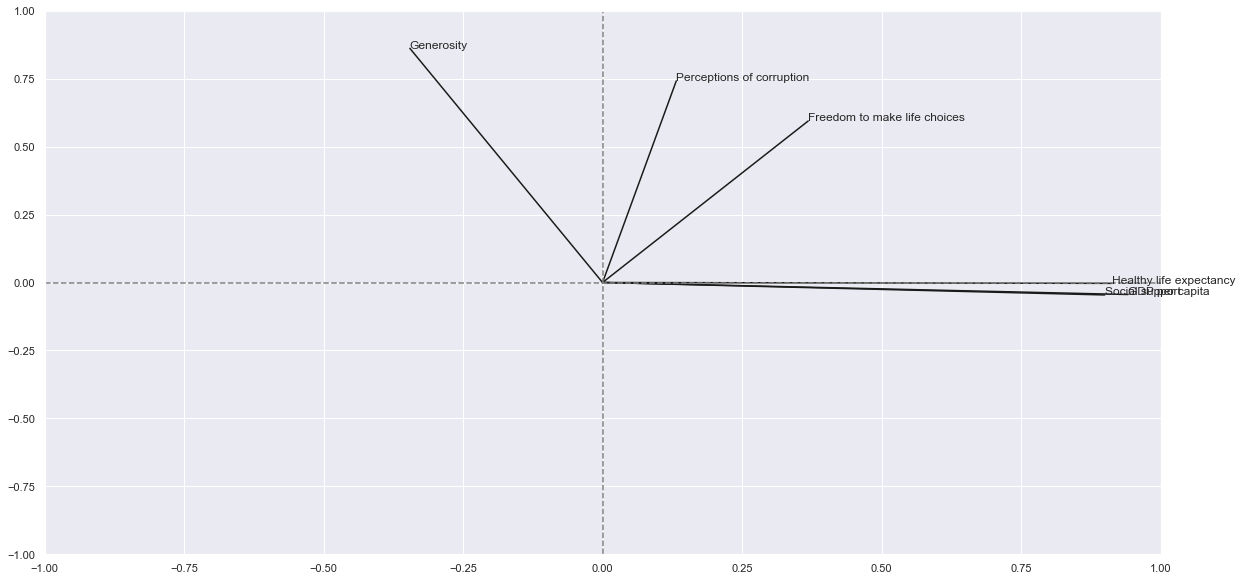

In [27]:
MyCol2 = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices','Generosity','Perceptions of corruption']
fa=FactorAnalyzer(rotation='promax' ,method='principal', n_factors=2) #n_factors=3, rotation='equamax',method ='principal'
fa.fit(X=happiness_scal_fa)
loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1','Factor 2'], index=MyCol)
print('Factor Loadings \n%s' %loadings)

for i, (x, y) in enumerate(zip(fa.loadings_[:,0], fa.loadings_[:,1])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, MyCol[i])

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable.

For example, in Factor 1, we can see that the features ‘GDP per capita’, ‘Social support’ and 'Healthy life expectancy' talkative have very high loadings than other variables. From this, we can see that Factor 1, explains the common variance in countries who are happy i.e. the variance among the countries who are well economicaly with strong social supportand Healthy life expectancy .

Factor 1 : GDP per capita, Social support, Healthy life expectancy

Factor 2: Freedom to make life choices, Generosity, Perceptions of corruption (we expect that this factor will not be coherent with the data , also we keep variable Freedom to make life choices in this factor even if its loading is not >0.6, but its close to it and close to the other loadings

In [28]:
#the Cronbach alpha can be used to measure whether or not the variables of a factor form a “coherent” and reliable factor. 
#A value above 0.6 for the alpha is in practice deemed acceptable.

#Create factors
factor1 = happiness[['GDP per capita', 'Social support','Healthy life expectancy']]
factor2 = happiness[[ 'Freedom to make life choices','Generosity','Perceptions of corruption']]

#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)

print(factor1_alpha, factor2_alpha)



(0.8880583672250256, array([0.854, 0.915])) (0.5920664920556358, array([0.467, 0.692]))


The low Cronbach’s alpha score for the 2nd scale is consistent with it only having 1 item withloadings > 0.6, its low eigenvalue and its low average communality, indicating that it should only be used with caution.

In [29]:
HAPPINESS_N_F= fa.fit_transform(happiness_scal_fa)


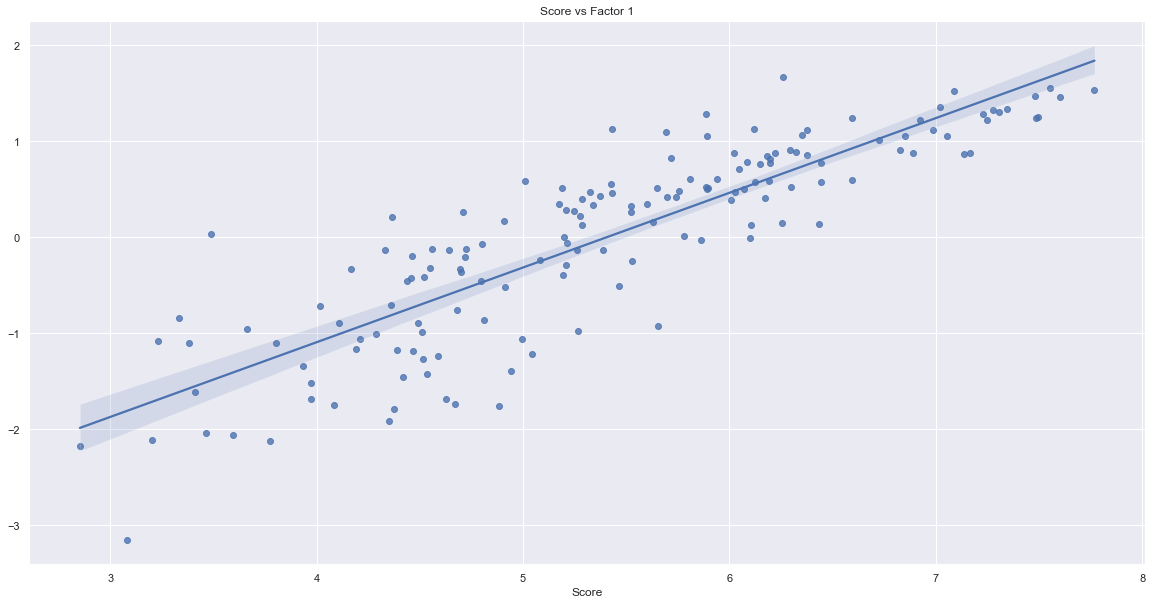

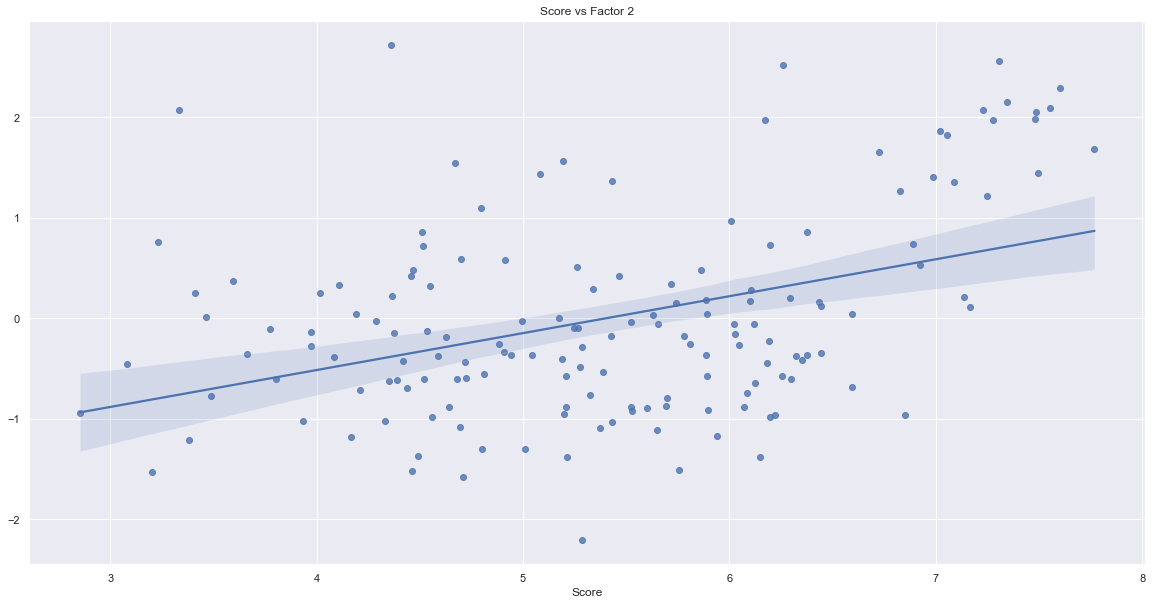

In [30]:
#Correlation check between factors and Score
sns.regplot(x=happiness['Score'], y=HAPPINESS_N_F[:,0]).set_title("Score vs Factor 1")
plt.show()
sns.regplot(x=happiness['Score'], y=HAPPINESS_N_F[:,1]).set_title("Score vs Factor 2")
plt.show()

The correlation shows that our first factor is in a good correlation with the score, but there is some dispersion with the second one, which confirm the the result above

The following scatter plot graphs the scores of the second factor versus the scores of the first factor.

In this scatter plot, the data appear normal and no extreme outliers are apparent. Except of country 155 : Central African Republic.
Maybe this could be explained by the fact that it is the country that comes last when we sum the values of the features: GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity and	Perceptions of corruption

also, we notice that the closest countries to it in the fraph are :156,154, 145 and 149. Together, they form the 5 countries with the lowest sum of the features

    155	Central African Republic : 3,709
    156	South Sudan : 4,332
    154	Afghanistan : 4,614
    145	Burundi : 5,224
    149	Syria : 5,384




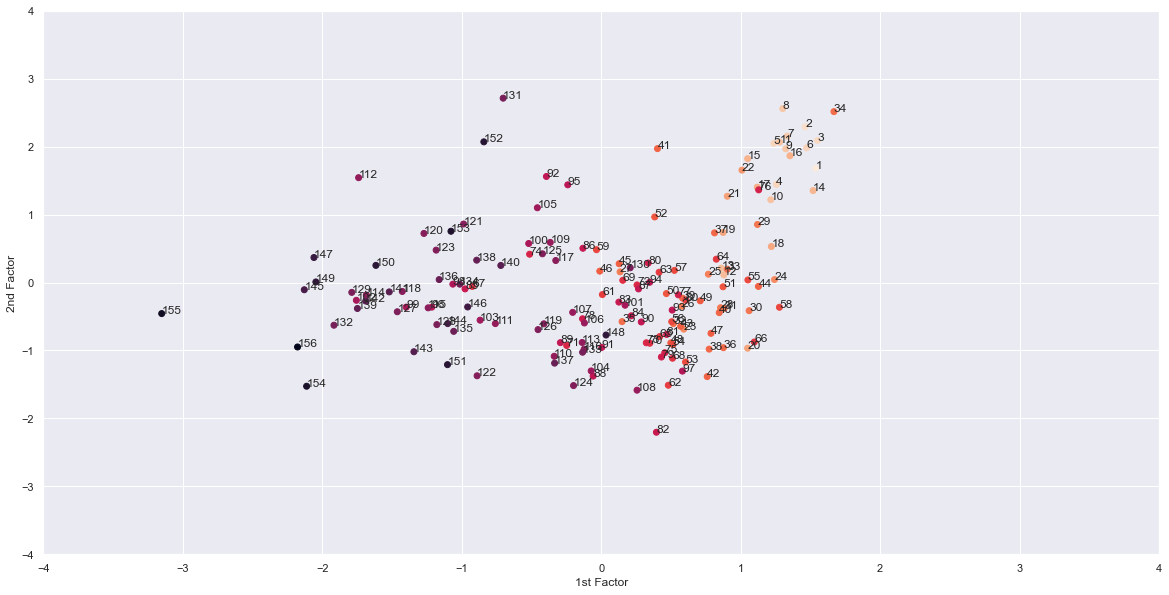

In [31]:
plt.scatter(HAPPINESS_N_F[:,0], HAPPINESS_N_F[:,1],c=happiness_scal[:,0])
plt.xlabel('1st Factor')
plt.ylabel('2nd Factor')
plt.xlim(-4,4)
plt.ylim(-4,4)

for i in range(HAPPINESS_N_F.shape[0]):
    #print(happiness.index[i]+1)
    plt.text(HAPPINESS_N_F[i,0], HAPPINESS_N_F[i,1], happiness.index[i]+1)




# Clustering

### Hierarchical clustering

The first methid we will use is hierarchical clustering.
It is important to use scaled data for clustering.

In [32]:
happiness_hc = happiness.drop(columns=["Score","Country or region","Overall rank"])

# We standardize (scale) the columns of interest
from sklearn.preprocessing import scale# Function to standardize the data 
happiness_scaled=pd.DataFrame(scale(happiness_hc),columns=happiness_hc.columns,index=happiness_hc.index) 

# We apply hierarchical clustering with dissimilarity measure "ward"
Z = linkage(happiness_scaled, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default
#print(Z)

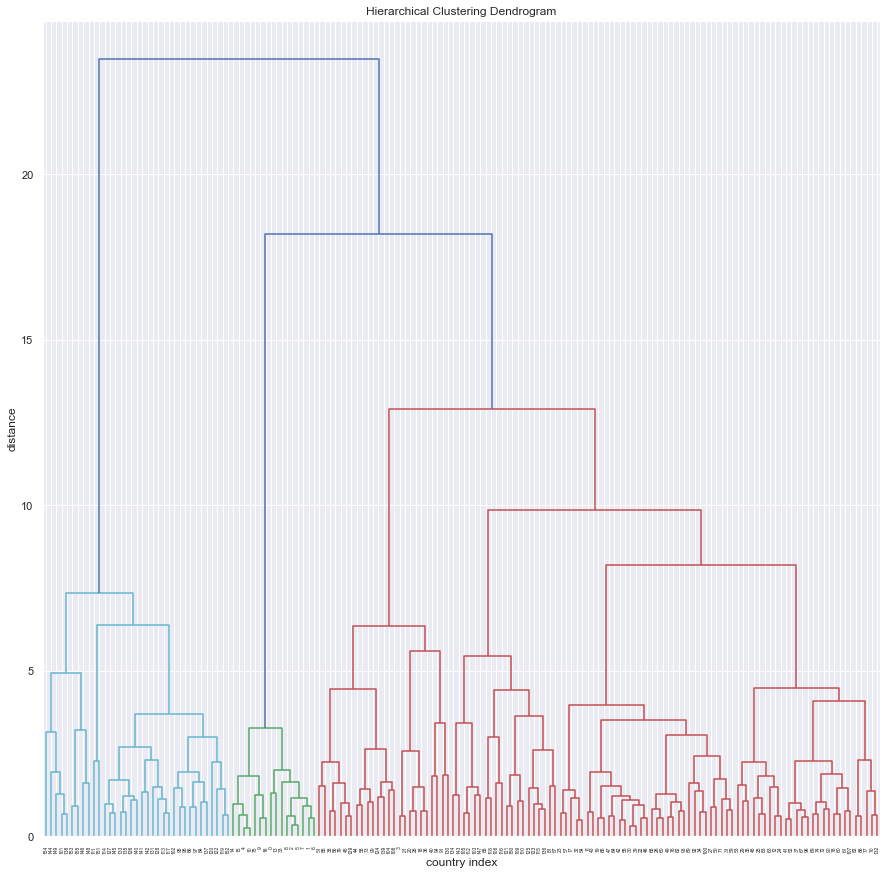

In [33]:
# We represent the corresponding Dendrogram
hierarchy.set_link_color_palette(['c', 'g', 'r'])
plt.figure(figsize=(15, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('country index')
plt.ylabel('distance')
dendrogram(Z,orientation='top')
plt.show()

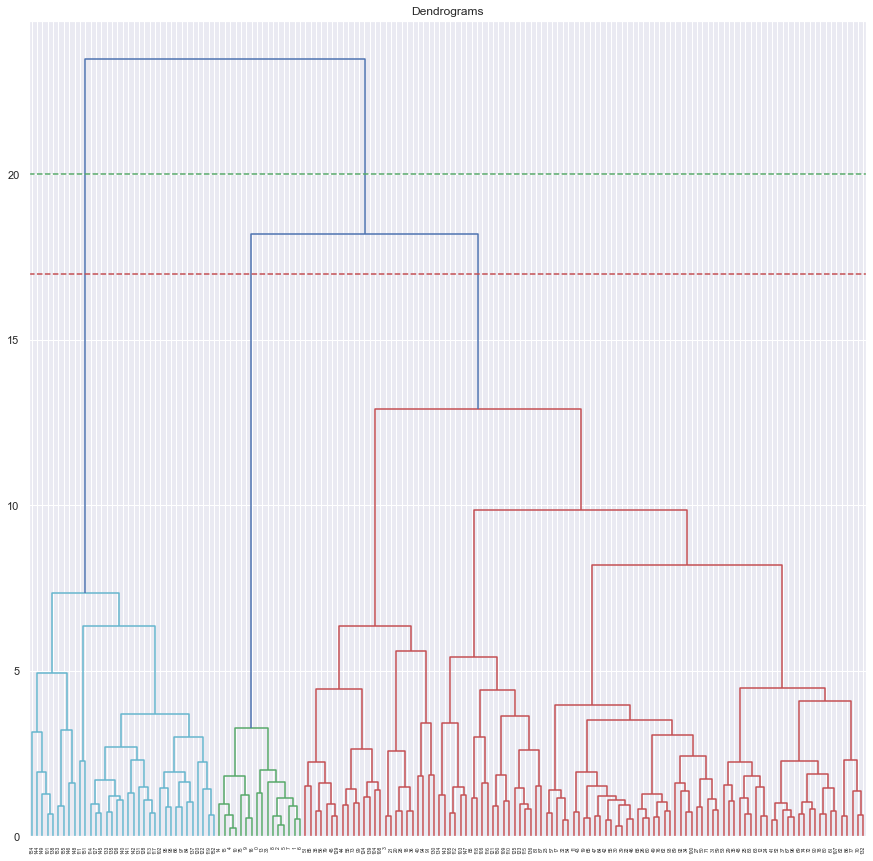

In [34]:
plt.figure(figsize=(15, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(happiness_scaled, method='ward'))
plt.axhline(y=17, color='r', linestyle='--')
plt.axhline(y=20, color='g', linestyle='--')

According to the dendogramm, we can choose 2 cluster (if we cut where the green line shows) but it's also possible to select 3 cluster (if we cut where the red line shows).
So we notice that this dendogramm analysis is more ambivalent to decide between 2 and 3. We will therefore test other methods in order to make a good decision about the number of clusters.

### K-means method

In order to determine the number of clusters, we will use the Elbow method :

In [35]:
X = happiness_new.iloc[:, [1, 2]].values
from sklearn.cluster import KMeans
d = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    d.append(kmeans.inertia_)

C:\Users\hkass\miniconda3\envs\LAB_3.9\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



C:\Users\hkass\miniconda3\envs\LAB_3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



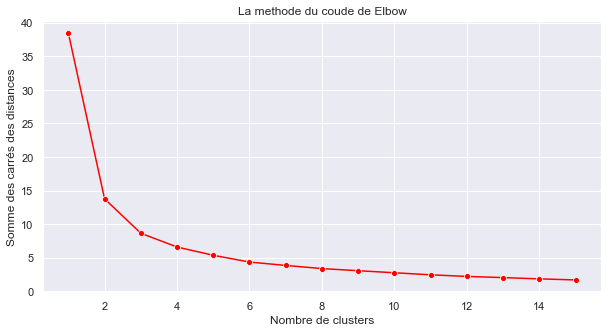

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 16), d,marker='o',color='red')
plt.title('La methode du coude de Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('Somme des carrés des distances')
plt.show()

In [37]:
#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\hkass\miniconda3\envs\LAB_3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\hkass\miniconda3\envs\LAB_3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\hkass\miniconda3\envs\LAB_3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



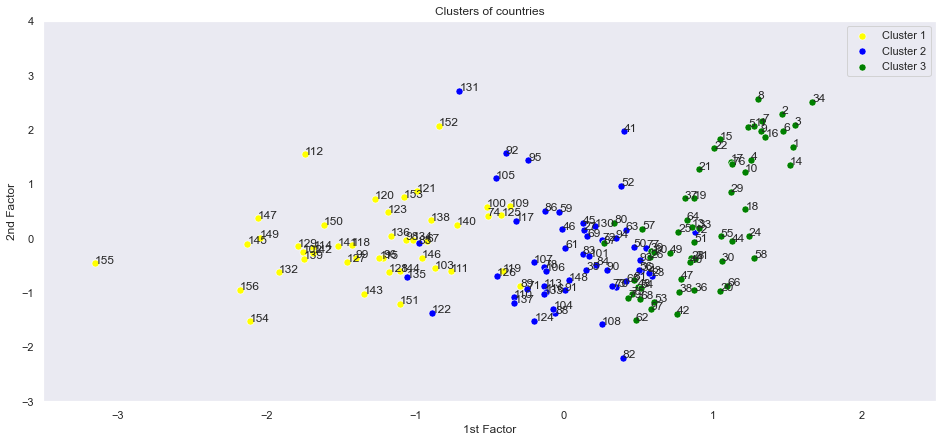

In [38]:
plt.figure(figsize=(16,7))
sns.scatterplot(HAPPINESS_N_F[y_kmeans == 0, 0], HAPPINESS_N_F[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(HAPPINESS_N_F[y_kmeans == 1, 0], HAPPINESS_N_F[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(HAPPINESS_N_F[y_kmeans == 2, 0], HAPPINESS_N_F[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)


plt.grid(False)
plt.title('Clusters of countries')
plt.xlabel('1st Factor')
plt.ylabel('2nd Factor')
plt.xlim(-3.5,2.5)
plt.ylim(-3,4)
plt.legend()
for i in range(HAPPINESS_N_F.shape[0]):
    plt.text(HAPPINESS_N_F[i,0], HAPPINESS_N_F[i,1], happiness.index[i]+1)

plt.show()

Using K-Means method, we have been able to define clusters on the scatter graph that we obtained of the second factor scores versus the first factor scores.

Yellow : Unhappy countries 
Blue : Normal countries
Vert : Happy countries

# Gaussian Mixture Models

The k-means clustering model presents practical challenges in its application. 
In particular, the non-probabilistic nature of k-means and its use of simple distance-from-cluster-center to assign cluster membership leads to poor performance for many real-world situations.


Gaussian mixture models are a probabilistic model for representing normally distributed subpopulations within an overall population.

They can be used for finding clusters in the same manner as k-mean. The diffrence is that k-means model places a circle at the center of each cluster, with a radius defined by the most distant point in the cluster. This radius acts as a hard cutoff for cluster assignment within the training set: any point outside this circle is not considered a member of the cluster. 

So for k-means,the cluster models must be circular: k-means has no built-in way of accounting for oblong or elliptical clusters. 

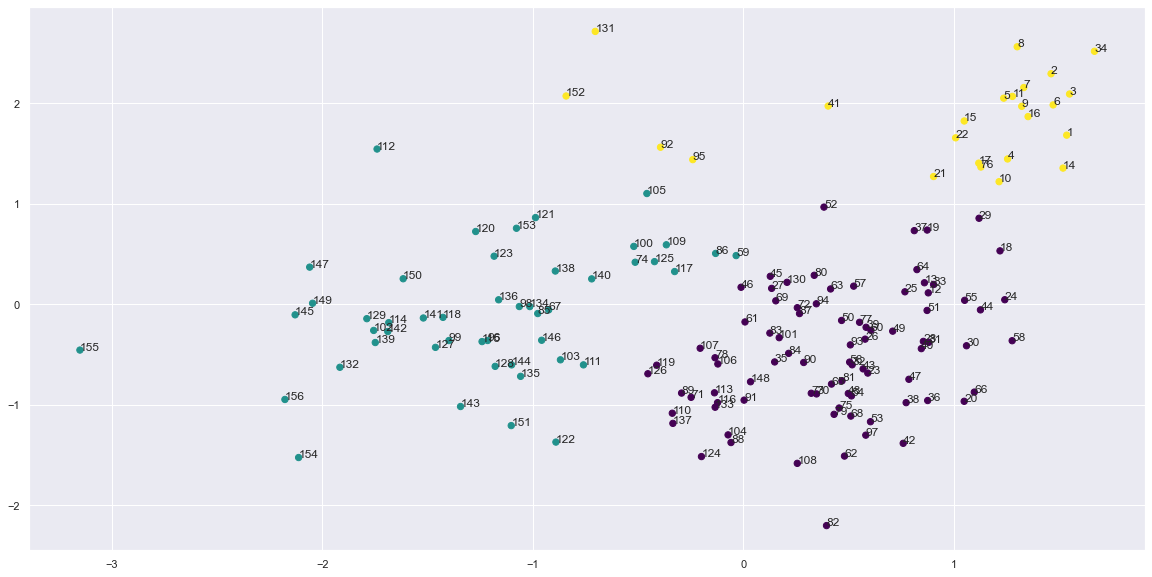

In [39]:
# Plot the data with GMM


#happinessGMM0 = happiness.drop(columns=["Country or region"])
#happinessGMM=vq.whiten(happinessGMM0) #Data normalization

from sklearn.mixture import GaussianMixture
#print(happinessGMM)

gmm = GaussianMixture(n_components=3).fit(HAPPINESS_N_F)
labels = gmm.predict(X=HAPPINESS_N_F)
plt.scatter(HAPPINESS_N_F[:, 0], HAPPINESS_N_F[:, 1], c=labels, s=40, cmap='viridis');
for i in range(HAPPINESS_N_F.shape[0]):
    plt.text(HAPPINESS_N_F[i,0], HAPPINESS_N_F[i,1], happiness.index[i]+1)

If we look closely at the k-means graph, we can clearly see that the clusters were created according to 3 circles; whether in the Gaussian Mixture Model above, the shapes of clusters are not identical and don"t form a circle 

Because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments in Scikit-Learn this is done using the predict_proba method. This returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster.

We can visualize this uncertainty by, for example, making the size of each point proportional to the certainty of its prediction; looking at the following figure, we can see that it is precisely the points at the boundaries between clusters that reflect this uncertainty of cluster assignment:

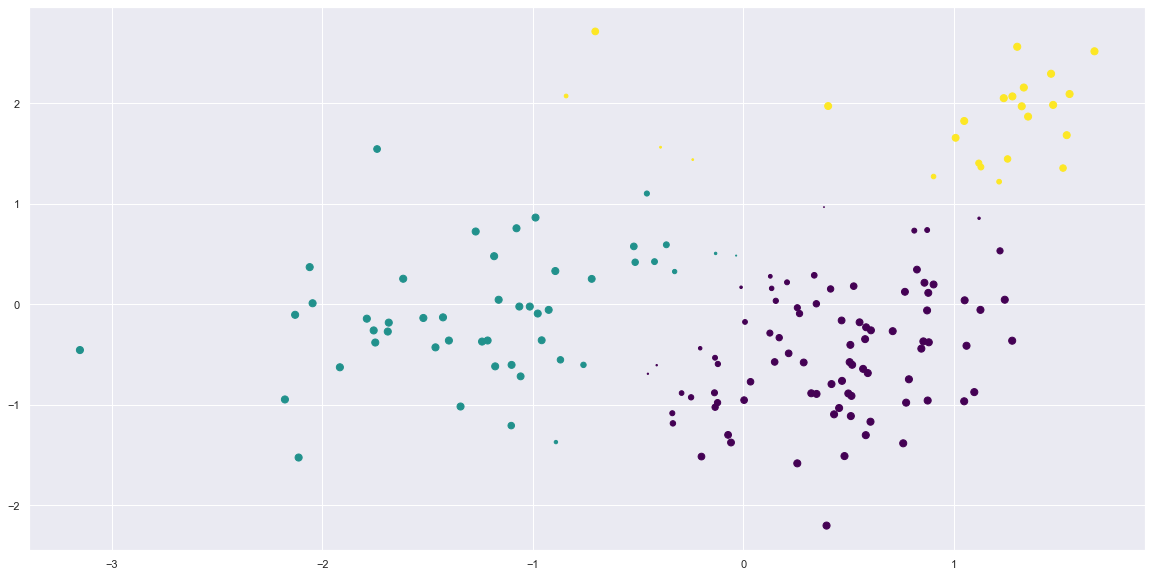

In [40]:
probs = gmm.predict_proba(HAPPINESS_N_F)
size = 50*probs.max(1) ** 6  # square emphasizes differences
plt.scatter(HAPPINESS_N_F[:, 0], HAPPINESS_N_F[:, 1], c=labels, cmap='viridis', s=size);

The following graph shows the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output:

'covariance_type' controls the degrees of freedom in the shape of each cluster.   
Setting this parameter to 'full' allows each cluster to be modeled as an ellipse with arbitrary orientation.

In [41]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_,gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

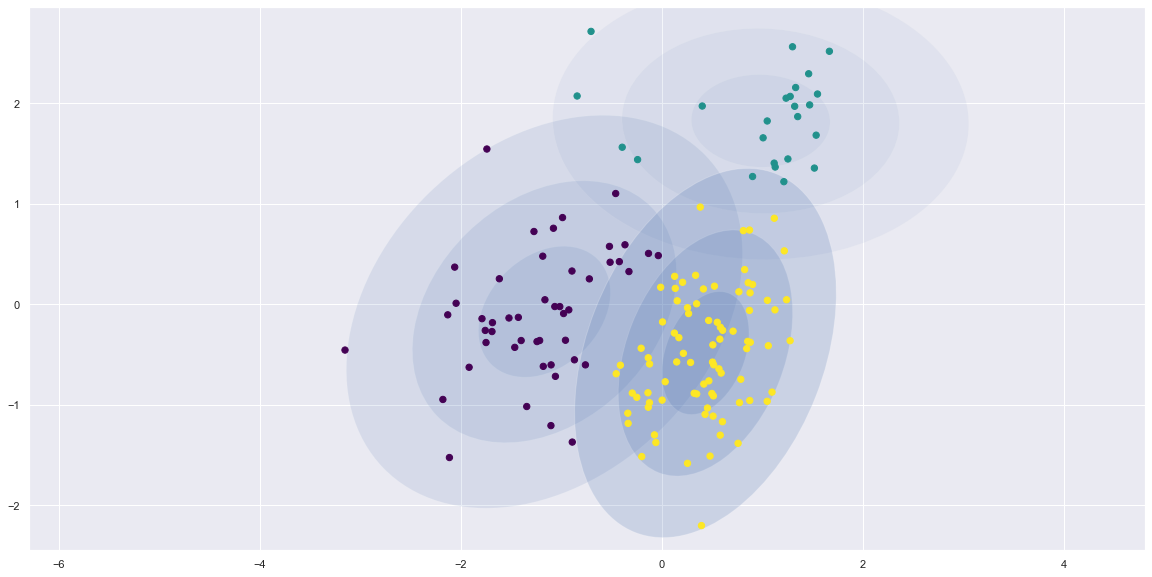

In [42]:
gmm = GaussianMixture(n_components=3, covariance_type='full',random_state=42)
plot_gmm(gmm, HAPPINESS_N_F)

We can use some analytic cretaria to avoid over-fitting :"the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably".

The optimal number of clusters is the value that minimizes the AIC or BIC
According to the graph below, AIC and BIC have a minimum value close to 3

C:\Users\hkass\miniconda3\envs\LAB_3.9\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



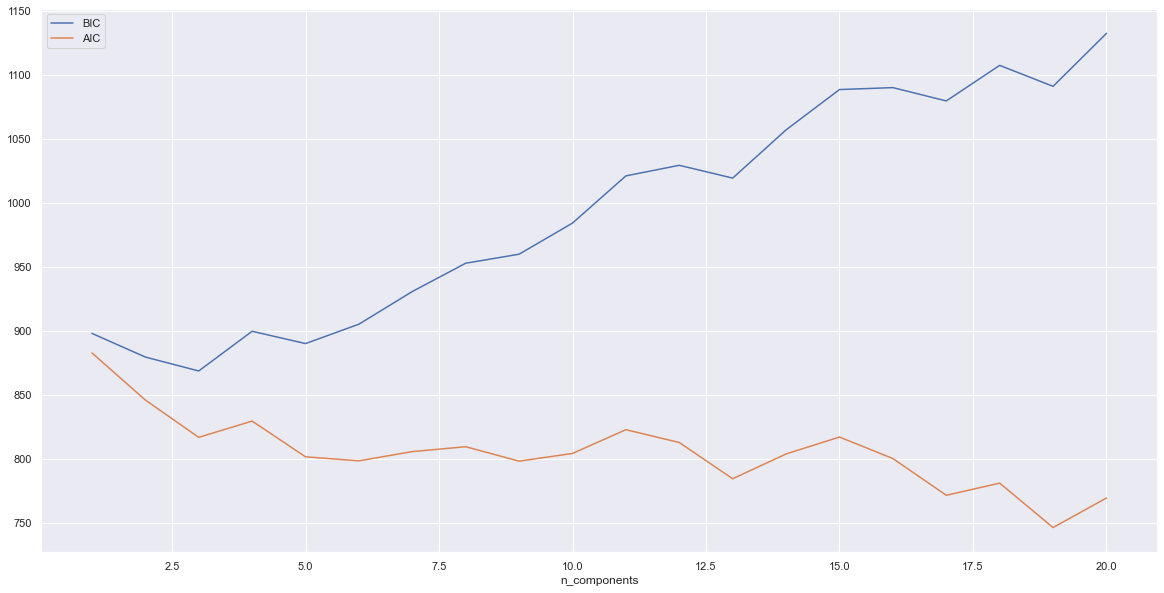

In [43]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(HAPPINESS_N_F)
          for n in n_components]

plt.plot(n_components, [m.bic(HAPPINESS_N_F) for m in models], label='BIC')
plt.plot(n_components, [m.aic(HAPPINESS_N_F) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

### CONCLUSION

This analysis allowed us to classify our data into three classes, firstly happy countries, secondly normal countries and thirdly unhappy countries. 
We also note that the determining factors in the score are mainly related to GDP per capita, social support and the health system. How can we predict the level of each country based on economic and social factors?